In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import gzip

In [ ]:
# Mounting Drive
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

PART 1


In [ ]:
# Loading data
df = pd.read_csv("Spotify_Playlist_Analysis.csv")

In [ ]:
# Checking dataset size
df.shape

(607, 18)

In [ ]:
# Showing the information
df.info

<bound method DataFrame.info of            Track Name                                 Album Name  \
0    Crying Lightning                                     Humbug   
1     Ode To The Mets                           The New Abnormal   
2      Buzzcut Season                               Pure Heroine   
3      I Know The End                                   Punisher   
4    Simulation Swarm  Dragon New Warm Mountain I Believe In You   
..                ...                                        ...   
602       Do Not Wait                            Nothing Happens   
603         Wild Time                             Titanic Rising   
604      Leif Erikson                  Turn On The Bright Lights   
605   Oceanic Feeling                                Solar Power   
606          Supercut                                  Melodrama   

      Artist Name(s) Release Date  Duration (ms)  Popularity  \
0     Arctic Monkeys   2009-08-20         224826          67   
1        The Strokes   

In [ ]:
# Dropping the duplicated values
df = df.drop_duplicates(subset = None)
df.shape

(594, 18)

In [ ]:
df.head()

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Crying Lightning,Humbug,Arctic Monkeys,2009-08-20,224826,67,"garage rock,modern rock,permanent wave,rock,sh...",0.498,0.885,4,-4.423,0,0.0461,0.0148,0.00041,0.239,0.670,106.719
1,Ode To The Mets,The New Abnormal,The Strokes,2020-04-10,351786,64,"alternative rock,garage rock,modern rock,perma...",0.426,0.617,1,-5.423,0,0.0289,0.3410,0.18100,0.101,0.201,92.002
2,Buzzcut Season,Pure Heroine,Lorde,2013-09-27,246755,68,"art pop,metropopolis,nz pop,pop",0.733,0.620,1,-10.525,1,0.0750,0.6060,0.30500,0.117,0.247,111.039
3,I Know The End,Punisher,Phoebe Bridgers,2020-06-18,344692,0,"indie pop,la indie",0.328,0.320,1,-10.282,1,0.0350,0.3240,0.01900,0.234,0.259,111.453
4,Simulation Swarm,Dragon New Warm Mountain I Believe In You,Big Thief,2022-02-11,252733,62,"art pop,brooklyn indie,indie pop,indie rock,sm...",0.703,0.578,1,-9.103,1,0.0728,0.4460,0.00240,0.102,0.670,105.204


In [ ]:
# Checking again
df = df.drop_duplicates(subset = None)

PART 2


In [ ]:
#show the first 5 rows
df.head(5)

,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Crying Lightning,Humbug,Arctic Monkeys,2009-08-20,224826,67,"garage rock,modern rock,permanent wave,rock,sh...",0.498,0.885,4,-4.423,0,0.0461,0.0148,0.00041,0.239,0.670,106.719
1,Ode To The Mets,The New Abnormal,The Strokes,2020-04-10,351786,64,"alternative rock,garage rock,modern rock,perma...",0.426,0.617,1,-5.423,0,0.0289,0.3410,0.18100,0.101,0.201,92.002
2,Buzzcut Season,Pure Heroine,Lorde,2013-09-27,246755,68,"art pop,metropopolis,nz pop,pop",0.733,0.620,1,-10.525,1,0.0750,0.6060,0.30500,0.117,0.247,111.039
3,I Know The End,Punisher,Phoebe Bridgers,2020-06-18,344692,0,"indie pop,la indie",0.328,0.320,1,-10.282,1,0.0350,0.3240,0.01900,0.234,0.259,111.453
4,Simulation Swarm,Dragon New Warm Mountain I Believe In You,Big Thief,2022-02-11,252733,62,"art pop,brooklyn indie,indie pop,indie rock,sm...",0.703,0.578,1,-9.103,1,0.0728,0.4460,0.00240,0.102,0.670,105.204


In [ ]:
#statistical summary 
df.describe()

,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,242163.707071,47.897306,0.532816,0.609467,5.469697,-8.024519,0.675084,0.049382,0.251596,0.109972,0.170078,0.439241,124.301288
std,67305.655426,23.347754,0.147752,0.210018,3.496554,3.201484,0.468738,0.040821,0.296811,0.221824,0.126547,0.228532,27.708996
min,96553.000000,0.000000,0.112000,0.052300,0.000000,-23.625000,0.000000,0.024300,0.000007,0.000000,0.042600,0.039400,65.740000
25%,199164.250000,38.000000,0.429000,0.447250,2.000000,-9.511500,0.000000,0.031050,0.013650,0.000053,0.097675,0.253500,104.981000
50%,231626.500000,53.000000,0.535500,0.630500,6.000000,-7.595000,1.000000,0.037600,0.111000,0.002225,0.118000,0.416000,123.166000
75%,275446.250000,64.000000,0.644000,0.788750,9.000000,-5.644500,1.000000,0.052300,0.410750,0.076550,0.205750,0.594000,141.366500
max,757440.000000,90.000000,0.888000,0.977000,11.000000,-0.734000,1.000000,0.464000,0.986000,0.954000,0.922000,0.979000,206.165000


In [ ]:
# Finding most frequent 10 artists
df_artists = df["Artist Name(s)"].value_counts()
df_artists.head(10)

Arctic Monkeys     48
Lorde              21
Nilüfer Yanya      20
Wolf Alice         18
Phoebe Bridgers    13
The Strokes        13
Big Thief          12
Alvvays            12
alt-J              12
girl in red        12
Name: Artist Name(s), dtype: int64

In [ ]:
# Extracting genres in a list
genres = df['Genres']
list_of_Genres = []

for genre in genres:
  genre = str(genre)
  list_of_Genres.extend(genre.split(","))

#max_occ = max(list_of_Genres,key=list_of_Genres.count)

In [ ]:
# Finding the occurences of max genre
counter = 0
max_occ = max(list_of_Genres,key=list_of_Genres.count)
for genre in list_of_Genres:
  if genre == max_occ:
    counter +=1

#print(counter)

print("The most common genre is " + max_occ + " with " + str(counter) + ' times.')

The most common genre is rock with 235 times.


In [ ]:
# create a new column
df['Positivity'] = df[['Danceability', 'Energy', 'Valence']].mean(axis=1)
df.describe()

In [ ]:
"""
songname = 'Crying Lightning'
artist = 'Arctic Monkeys'
"""
# filter by track name and artist name
filtered_data = df[(df["Track Name"] == "Crying Lightning") & (df["Artist Name(s)"] == "Arctic Monkeys")]

# print the filtered data
print(filtered_data)

In [ ]:
df.describe()

In [ ]:
# sorting by energy in decending order
# creating a new dataframe
energetic_df = df.sort_values(by='Energy', ascending=False)

In [ ]:
# showing most energetic three songs
print("The most energetic three songs in the playlist is:")
energetic_df.head(3)

In [ ]:
# creating positivity df
positivity_df = df.sort_values(by='Positivity', ascending=False)
print("The most positive three songs in the playlist is:")
positivity_df.head(3)

PART 3


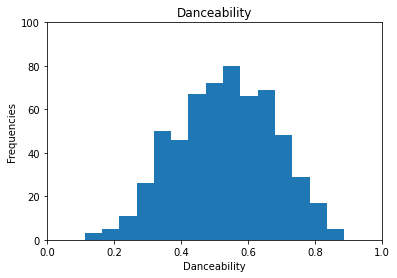

count    594.000000
mean       0.532816
std        0.147752
min        0.112000
25%        0.429000
50%        0.535500
75%        0.644000
max        0.888000
Name: Danceability, dtype: float64

In [ ]:
# create a histogram of the "Danceability" column
plt.hist(df['Danceability'], bins=15)

# set the title and labels for the histogram
plt.title('Danceability')
plt.ylabel('Frequencies')
plt.xlabel('Danceability')

# set the boundaries for the x and y axes
plt.ylim([0, 100])
plt.xlim([0, 1])

# show the histogram
plt.show()

# show the statistical properties
df['Danceability'].describe()

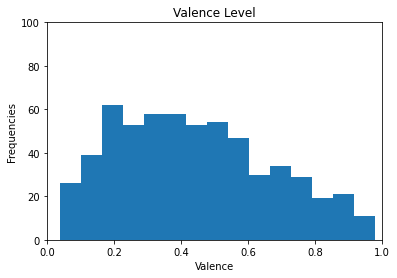

count    594.000000
mean       0.439241
std        0.228532
min        0.039400
25%        0.253500
50%        0.416000
75%        0.594000
max        0.979000
Name: Valence, dtype: float64

In [ ]:
plt.hist(df['Valence'], bins=15)

# set title and labels
plt.title('Valence Level')
plt.xlabel('Valence')
plt.ylabel('Frequencies')

# set axis boundaries
plt.xlim([0, 1])
plt.ylim([0, 100])

# display the histogram
plt.show()

# display statistical properties of the "Valence" column using pandas
df['Valence'].describe()

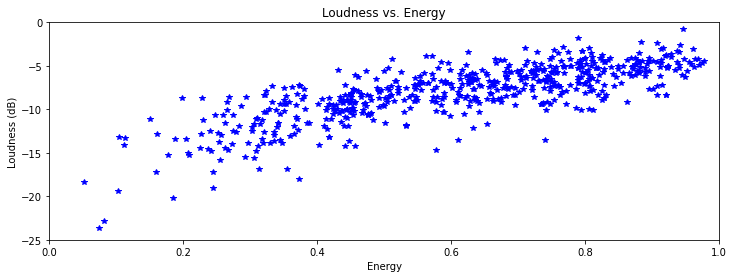

In [ ]:
plt.figure(figsize=(12, 4))
plt.xlim(0.0,1.0)
plt.ylim(-25.0,0.0)
plt.title("Loudness vs. Energy")
plt.xlabel("Energy")
plt.ylabel("Loudness (dB)")
plt.plot(df["Energy"], df["Loudness"],color="blue",linestyle=" ",marker="*")
plt.show()

In [ ]:
# create a function to assign emotions
def assign_emotion(pos):
    if pos <= 0.45:
        return 'Sad'
    elif pos >= 0.57:
        return 'Happy'
    else:
        return 'Neutral'
  
# create 'Emotion' column using the function on 'Positivity'
df['Emotion'] = df['Positivity'].apply(assign_emotion)

# create new dataframe with desired artists
new_artist_df = df[df['Artist Name(s)'].isin(['Phoebe Bridgers', 'The Strokes', 'alt-J', 'girl in red'])]

# sort new dataframe by positivity in ascending order
new_artist_df = new_artist_df.sort_values(by='Positivity')

# show first 5 rows
print(new_artist_df.head())

         Track Name            Album Name   Artist Name(s) Release Date  \
193   Smoke Signals  Stranger in the Alps  Phoebe Bridgers   2017-09-22   
267         Funeral  Stranger in the Alps  Phoebe Bridgers   2017-09-22   
349       Moon Song              Punisher  Phoebe Bridgers   2020-06-18   
329        Punisher              Punisher  Phoebe Bridgers   2020-06-18   
295  I Know The End              Punisher  Phoebe Bridgers   2020-06-18   

     Duration (ms)  Popularity              Genres  Danceability  Energy  Key  \
193         324773          61  indie pop,la indie         0.265   0.237   10   
267         232373          65  indie pop,la indie         0.218   0.263   11   
349         277676           0  indie pop,la indie         0.380   0.240    1   
329         189622           0  indie pop,la indie         0.428   0.226    1   
295         344692          70  indie pop,la indie         0.323   0.323    1   

     Loudness  Mode  Speechiness  Acousticness  Instrumentalne

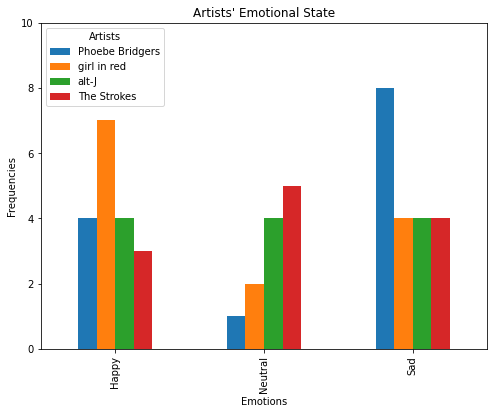

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the frequencies of each emotion by the artist
new_artist_df.groupby(['Emotion', 'Artist Name(s)']).size().unstack().plot(kind='bar', ax=ax)

# Set title
ax.set_title("Artists' Emotional State")

# Set x-tick labels
ax.set_xticklabels(['Happy', 'Neutral', 'Sad'])

# Set y-axis boundaries
ax.set_ylim([0, 10])

# Set x and y labels
ax.set_xlabel('Emotions')
ax.set_ylabel('Frequencies')

# Set legend
ax.legend(title='Artists', labels=['Phoebe Bridgers', 'girl in red', 'alt-J', 'The Strokes'])

# Show the plot
plt.show()